In [1]:
#importing the neccessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
#mounting on google drive

from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [4]:
%cd gdrive/MyDrive/MainProject

/content/gdrive/MyDrive/MainProject


In [5]:
#reading and checking the basic structure of the data
data = pd.read_csv("train_new1.csv",encoding='latin-1')
data.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,no
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,no
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,no
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,no
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,no


In [6]:
# Dropping the redundant looking columns 
to_drop = ["id","qid1","qid2"]
data = data.drop(data[to_drop], axis=1)
data.head()

,question1,question2,is_duplicate
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,no
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,no
2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,no
3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,no
4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,no


In [7]:
# using info method
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   question1     404290 non-null  object
 1   question2     404290 non-null  object
 2   is_duplicate  404290 non-null  object
dtypes: object(3)
memory usage: 9.3+ MB


In [8]:
# statistical info of dataset
data.describe()

,question1,question2,is_duplicate
count,404290,404290,404290
unique,290457,299175,2
top,How do I improve my English speaking?,How can you look at someone's private Instagra...,no
freq,50,120,255027


In [9]:
# # Mapping Values for labels  
# data['is_duplicate'] = data['is_duplicate'].map({'no': 0, 'yes': 1}) 
# data.head(8)

In [10]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
data['is_duplicate']=le.fit_transform(data['is_duplicate'])

In [11]:
data['is_duplicate'].unique()

array([0, 1])

In [12]:
dup=data[data['is_duplicate']==1]
org=data[data['is_duplicate']==0]

In [13]:
data.head()

,question1,question2,is_duplicate
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


Text(0, 0.5, 'Number of Data points')

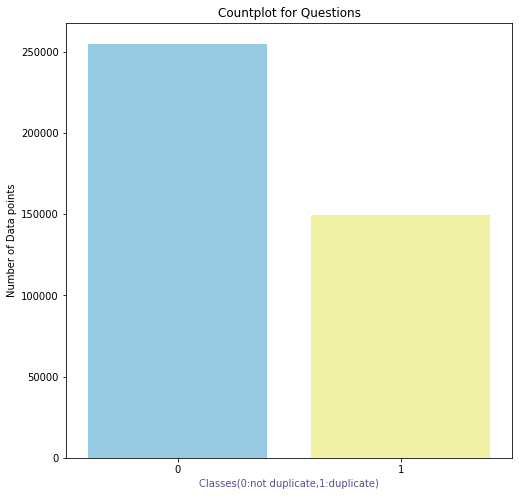

In [14]:
#Palette
cols= ["#89cff0", "#fdfd96"] 
plt.figure(figsize=(8,8))
fg = sns.countplot(x= data["is_duplicate"], palette= cols)
fg.set_title("Countplot for Questions")
fg.set_xlabel("Classes(0:not duplicate,1:duplicate)", color="#58508d")
fg.set_ylabel("Number of Data points")

In [16]:
#check duplicate
q_dup=data[data.duplicated()]
print(q_dup)

Empty DataFrame
Columns: [question1, question2, is_duplicate]
Index: []


In [15]:
data.is_duplicate.value_counts()

0    255027
1    149263
Name: is_duplicate, dtype: int64

In [17]:
under_org=org.sample(149263,axis=0)

In [ ]:
under_org.shape

(149263, 3)

In [18]:
balanced_data=pd.concat([dup,under_org])
balanced_data.shape

(298526, 3)

In [19]:
balanced_data.is_duplicate.value_counts()

1    149263
0    149263
Name: is_duplicate, dtype: int64

In [20]:
balanced_data.head(100)

,question1,question2,is_duplicate
5,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1
7,How can I be a good geologist?,What should I do to be a great geologist?,1
11,How do I read and find my YouTube comments?,How can I see all my Youtube comments?,1
12,What can make Physics easy to learn?,How can you make physics easy to learn?,1
13,What was your first sexual experience like?,What was your first sexual experience?,1
...,...,...,...
255,Will Modi win in 2019?,Can Narendra Modi become Prime Minister of Ind...,1
260,"What exactly is the ""Common Core Initiative/St...",What are the pros and cons of the Common Core ...,1
261,How do I choose a journal to publish my paper?,Where do I publish my paper?,1
262,What are your New Year's resolutions for 2017?,What is your creative New Year's resolution fo...,1


In [21]:
balanced_data.tail()

,question1,question2,is_duplicate
8775,How much did the old Candid Camera show pay pe...,Why do people like Breaking Bad so much? Why w...,0
401083,I want to confess my love towards him. Is this...,When is the right time to confess love to some...,0
16967,"In movies and Series, I have seen people sayin...",I've seen and heard some people say they love ...,0
378095,What are the major problems that the Indian Ra...,Write a program to print the following pattern?,0
215142,Is the driver job in Uber considered as work e...,Does working in an Indian IT service company b...,0


In [22]:

# saving the dataframe
balanced_data.to_csv('balanced_data.csv')

Text(0, 0.5, 'Number of Data points')

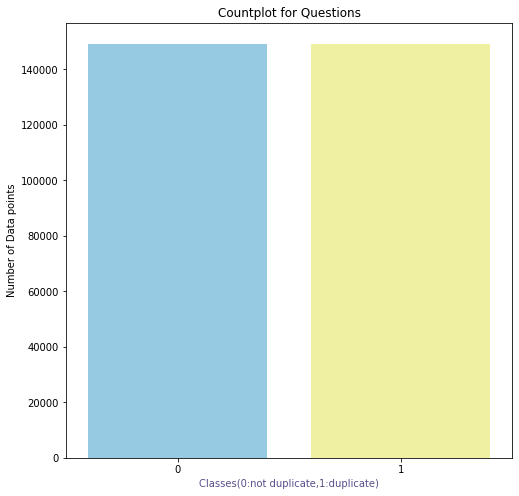

In [23]:
#Palette
cols= ["#89cff0", "#fdfd96"] 
plt.figure(figsize=(8,8))
fg = sns.countplot(x= balanced_data["is_duplicate"], palette= cols)
fg.set_title("Countplot for Questions")
fg.set_xlabel("Classes(0:not duplicate,1:duplicate)", color="#58508d")
fg.set_ylabel("Number of Data points")

In [24]:
# split dataset
X = balanced_data.iloc[:, 0:2]
y = balanced_data.iloc[:, 2]

In [25]:
X.head()

,question1,question2
5,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan..."
7,How can I be a good geologist?,What should I do to be a great geologist?
11,How do I read and find my YouTube comments?,How can I see all my Youtube comments?
12,What can make Physics easy to learn?,How can you make physics easy to learn?
13,What was your first sexual experience like?,What was your first sexual experience?


In [26]:
from sklearn.model_selection import train_test_split
# Splitting the testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [27]:
# libraries for performing NLP 

import nltk
import re
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# import spacy
# nlp = spacy.load("en_core_web_sm")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [28]:
# Cleaning the messages
def Cleaning(text):
  corpus = []
  wnl = WordNetLemmatizer()

  for question in list(text):

   # Cleaning special character from the questions
    quest = re.sub(pattern='[^a-zA-Z]', repl=' ', string=question)

   # Converting the entire question into lower case
    quest = quest.lower()

    # to remove numeric digits from string
    quest = ''.join([i for i in quest if not i.isdigit()])

    # Tokenizing the question by words
    words = quest.split()
    
    # Removing the stop words
    filtered_words = [word for word in words if word not in set(stopwords.words('english'))]

    # Lemmatizing the words
    lemmatized_words = [wnl.lemmatize(word,'v') for word in filtered_words]

    # Joining the lemmatized words
    quest = ' '.join(lemmatized_words)

   # Building a corpus of question
    corpus.append(quest)
  return corpus


In [30]:
xtestq1=Cleaning(X_test['question1'])

In [36]:
dfq1test = pd.DataFrame(xtestq1)

In [37]:
dfq1test.to_csv('xtestq1.csv',index=False)

In [38]:
dfq1test.head()

,0
0,make sense use asic bitcoin devices deep learn
1,best riddle riddler batman
2,top government colleges india offer bsc biotec...
3,people celebrate birthdays blow candle cut cak...
4,polka dot say


In [39]:
xtestq2=Cleaning(X_test['question2'])
dfq2test = pd.DataFrame(xtestq2)
dfq2test.to_csv('xtestq2.csv',index=False)
dfq2test.head()

,0
0,many phalanges human hand function
1,voice riddler batman arkham asylum
2,best bsc biotechnology colleges india
3,significance logic behind blow candle birthday...
4,polka dot call polka dot


In [40]:
xtrainq1=Cleaning(X_train['question1'])
dfq1train = pd.DataFrame(xtrainq1)
dfq1train.to_csv('xtrainq1.csv',index=False)
dfq1train.head()

,0
0,effect stock market indian government decision...
1,much american culture war preserve traditional...
2,view ban rupee note india
3,indian movies corrupt indian youth
4,best fitness tracker swim


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [41]:
xtrainq2=Cleaning(X_train['question2'])
dfq2train = pd.DataFrame(xtrainq2)
dfq2train.to_csv('xtrainq2.csv',index=False)
dfq2train.head()

,0
0,indian stock market react pm modi decision abo...
1,much american culture evident europe
2,think ban denomination note india
3,movies corrupt indian youth
4,best fitness tracker


In [ ]:
# with open ('text.txt', 'w') as file:  
#     for line_1 in xtest1:  
#         file.write(line_1)  
#         file.write('\n')  